Project :- SALES PREDICTION USING PYTHON

1)Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

2)
In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.

In [3]:
#Importing important Libraries
import pandas as pd
import numpy as np

In [4]:
#Read dataset and Analyzing
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
#Getting the Shape
df.shape

(200, 4)

In [6]:
#Getting the Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
#Getting the Null values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [10]:

#Getting Duplicate values
df.duplicated().sum()

0

In [12]:
#Getting the EDA
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


1)As the data is already cleaned so be can dive into the univariate and multivariate analysis

2)Making a copy to original file for any data lost precaution

In [13]:
df1 = df.copy()

#Univariate analysis

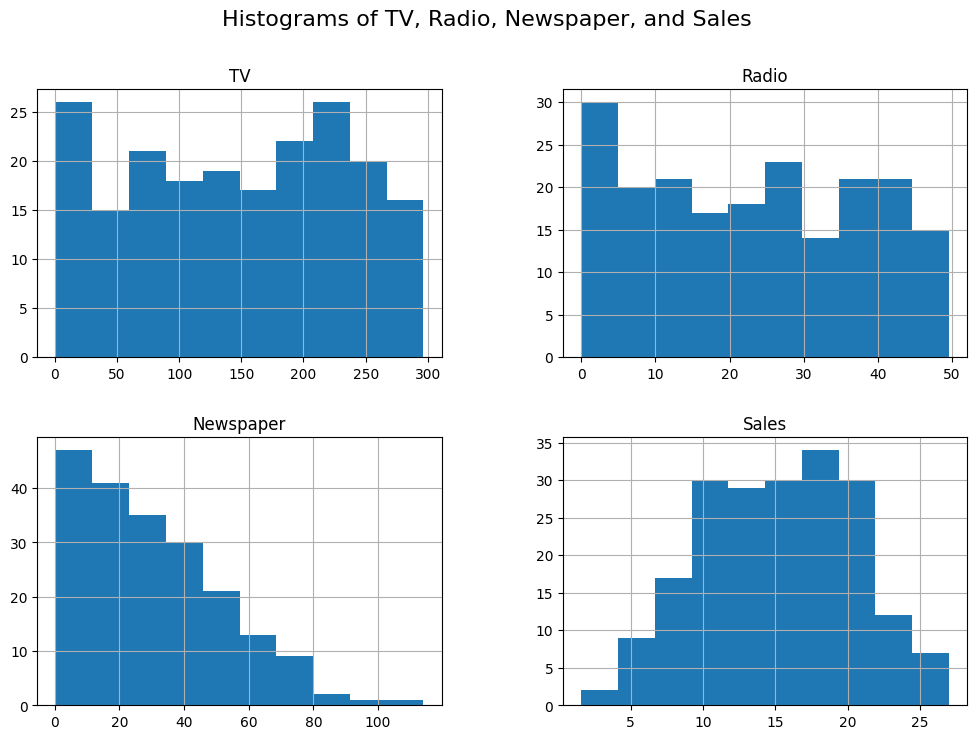

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


df1.hist(bins=10, figsize=(12, 8))
plt.suptitle('Histograms of TV, Radio, Newspaper, and Sales', fontsize=16)
plt.show()

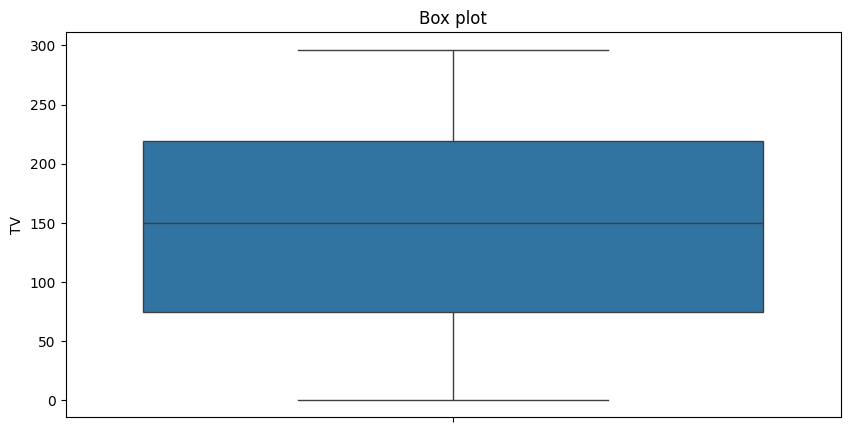

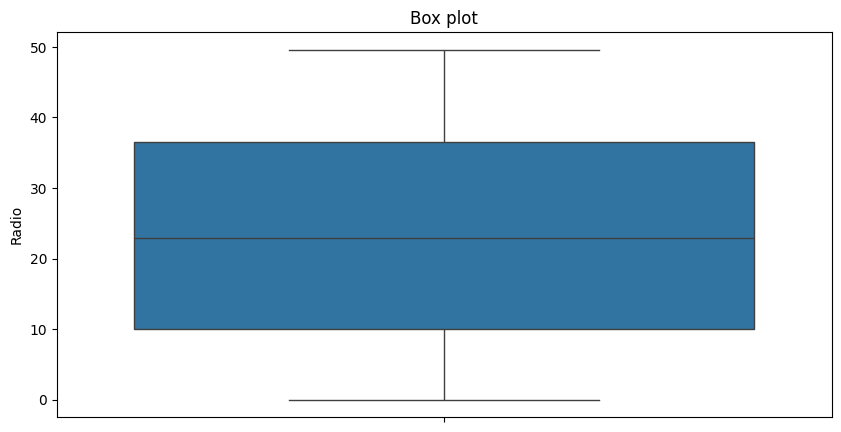

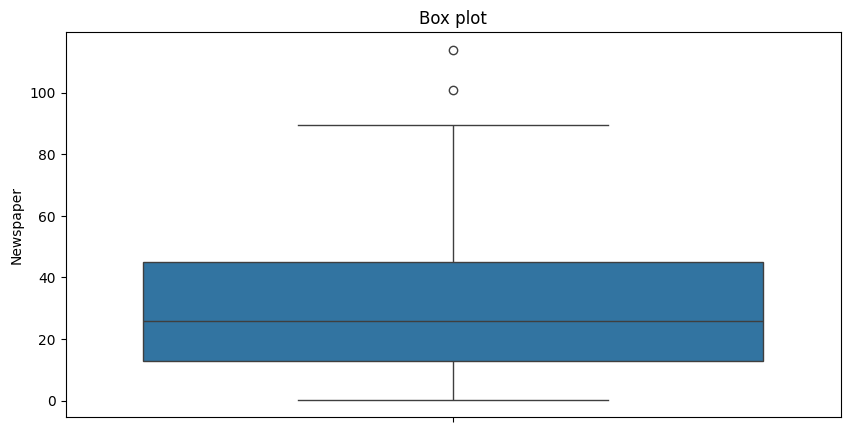

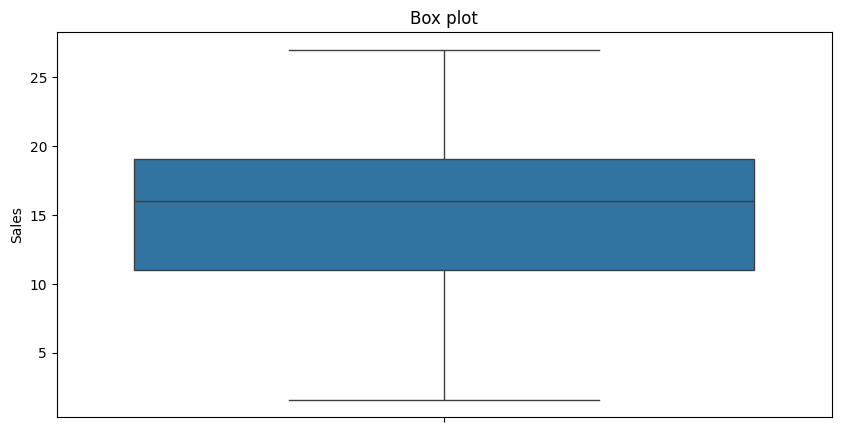

In [15]:
# Box plot for checking outliers
plt.figure(figsize=(10,5))
sns.boxplot(df1['TV'])
plt.title('Box plot')
plt.show()

plt.figure(figsize= (10,5))
sns.boxplot(df1['Radio'])
plt.title('Box plot')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(df1['Newspaper'])
plt.title('Box plot')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(df1['Sales'])
plt.title('Box plot')
plt.show()

###Analysis conclusion
* **TV and Radio:** Advertising investments are well-distributed and might have a steady influence on sales.

* **Newspaper:** Expenditures, on the other hand, show more variability with outliers, indicating that this medium might not be as consistently impactful for sales.
* **Sales:** Are normally distributed, which is ideal for modeling and prediction.

#Multivariate Analysis

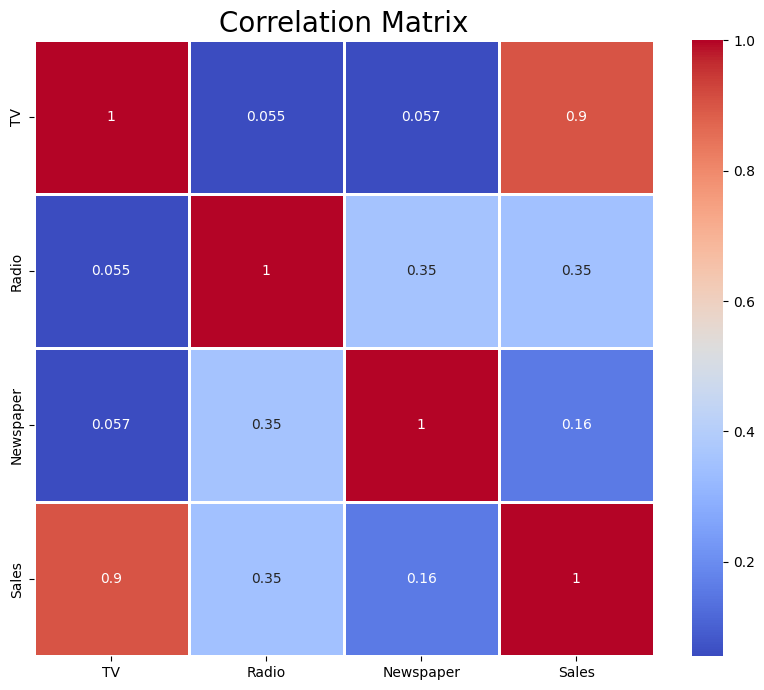

In [16]:
#Correlation Matrix
corr_Matrix = df1.corr()

#Using Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_Matrix, annot=True, cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Matrix', fontsize=20)
plt.show()



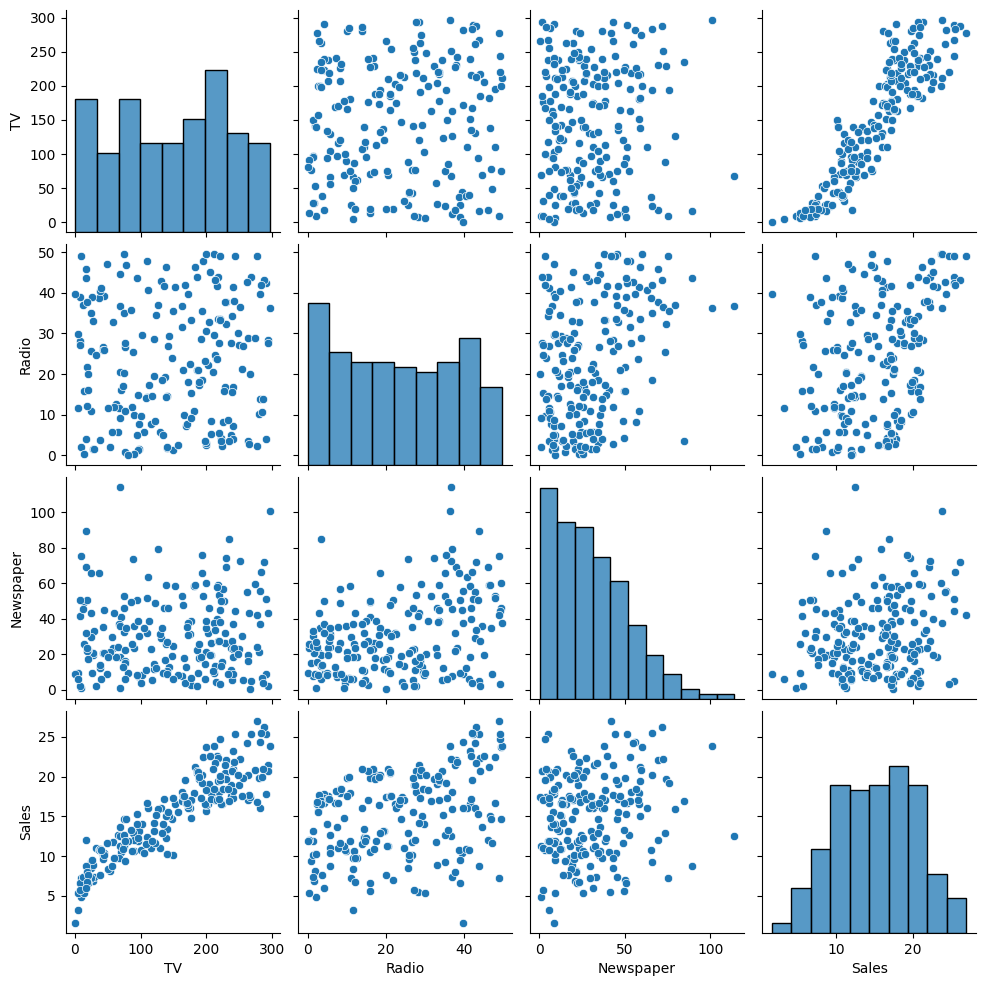

In [17]:
# Pairplot for visualizing relationships between variables
sns.pairplot(df1)
plt.title('')
plt.show()

#Preprocessing

In [23]:
#Handling Outliers
def remove_outliers(df1, columns):
  # IQR method
  for column in columns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #Filter out the outliers
    df1 = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]

  return df1

#Apply the function
df1 = remove_outliers(df1, ['TV', 'Radio', 'Newspaper', 'Sales'])
print(df1)


        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[198 rows x 4 columns]


In [25]:
#Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_normalised = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
df_normalised.head()

#Standardization
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
df_standardized.head()

#Log Transformation for Right-Skewed Column
df_tranformed = df1.copy()
df_tranformed['Newspaper'] = np.log1p(df_tranformed['Newspaper'])

#Print Transformed DataFrames
print("\nNormalized Data:\n",df_normalised.head())
print("\nStandardized Data:\n",df_standardized.head())
print("\nTransformed Data:\n",df_tranformed.head())



Normalized Data:
          TV     Radio  Newspaper     Sales
0  0.783202  0.762097   0.773288  0.807087
1  0.149539  0.792339   0.502806  0.346457
2  0.056333  0.925403   0.774411  0.409449
3  0.514851  0.832661   0.653199  0.586614
4  0.614886  0.217742   0.652076  0.641732

Standardized Data:
          TV     Radio  Newspaper     Sales
0  0.978697  0.989521   1.932998  1.331341
1 -1.199012  1.090705   0.751313 -0.893900
2 -1.519332  1.535913   1.937901 -0.589594
3  0.056456  1.225616   1.408349  0.266268
4  0.400243 -0.831784   1.403446  0.532536

Transformed Data:
       TV  Radio  Newspaper  Sales
0  230.1   37.8   4.251348   22.1
1   44.5   39.3   3.830813   10.4
2   17.2   45.9   4.252772   12.0
3  151.5   41.3   4.085976   16.5
4  180.8   10.8   4.084294   17.9


In [ ]:
#Creating the model by Linear regession
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select the feature(s) and target
# Assume 'target' is the column to predict, and 'feature1', 'feature2' are independent variables
X = df1[['TV', 'Radio','Newspaper']]  # Independent variables (features)
y = df1['Sales']  # Dependent variable (target)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the Linear Regression model
model = LinearRegression()

# Step 4: Fit the model to the training data
model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model performance
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 7: Display coefficients (weights) and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826
Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214127


In [ ]:
#Model by RandomForestRegressor
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor


#  Define your features (X) and target (y)
# Assume 'target_column' is the column you want to predict, and the rest are features
X = df1.drop('Sales', axis=1)
y = df1['Sales']

#  Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of trees

#  Train the model
rf.fit(X_train, y_train)

#  Make predictions on the test set
y_pred = rf.predict(X_test)

#  Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-Squared: {r2}')



Mean Squared Error (MSE): 1.4374328500000009
R-Squared: 0.9534827934927883


#Model Building

 ###Model Comparision Linear Regression, Random Forest Regressor and SVR

Linear Regression:
MSE: 2.415728945593508, MAE: 1.2310754565160393, R2 Score: 0.9130003152798273

Random Forest:
MSE: 1.0059910000000027, MAE: 0.8363000000000028, R2 Score: 0.9637703973407377


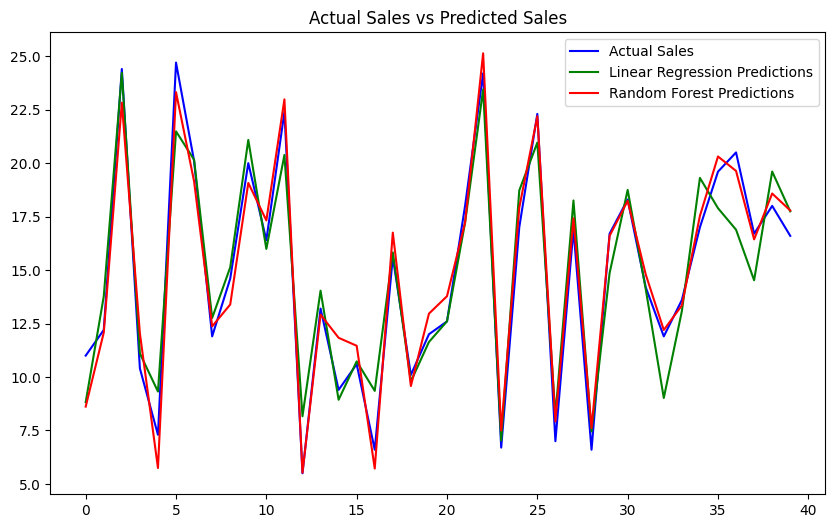

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Features and Target
X = df1[['TV', 'Radio', 'Newspaper']]
y = df1['Sales']

#Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse}, MAE: {mae}, R2 Score: {r2}')
    return y_pred

#Output
print("Linear Regression:")
linear_pred = evaluate_model(linear_model, X_test, y_test)

print("\nRandom Forest:")
rf_pred = evaluate_model(rf_model, X_test, y_test)

#Visualization of Results
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Sales', color='b')
plt.plot(linear_pred, label='Linear Regression Predictions', color='g')
plt.plot(rf_pred, label='Random Forest Predictions', color='r')
plt.legend()
plt.title('Actual Sales vs Predicted Sales')
plt.show()

Random Forest give the good value of R2 which is 95% . Hence it predicting the good model